<a href="https://colab.research.google.com/github/GaryChen1990/ximen0725/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanic Dataset from Github(koggle dataset)

In [29]:
#Catch data
from urllib.request import urlretrieve
url = ("https://github.com/GaryChen1990/ximen0725/raw/main/titanic/train.csv"
)
urlretrieve (url, "train.csv")

url = ("https://github.com/GaryChen1990/ximen0725/raw/main/titanic/test.csv"
)
urlretrieve (url, "test.csv")

('test.csv', <http.client.HTTPMessage at 0x7a9b00f098d0>)

In [30]:
import pandas as pd
datas = pd.read_csv("train.csv", encoding="utf-8")
datas_predict = pd.read_csv("test.csv", encoding="utf-8")
datas_predict

datas_total = pd.concat([datas, datas_predict], axis=0)
datas_total = datas_total.drop(["PassengerId","Survived"], axis = 1)

In [31]:
# 轉換： Series(1D).apply(函式型態)
#demo: apply

#s = pd.Series([1, 2, 3, 4])
#def func(n):
#  return n ** 2
#print(s)

#s.apply(func)

In [32]:
def name(n):
  return n.split(",")[-1].split(".")[0].strip()

datas_total["Name"] = datas_total["Name"].apply(name)
datas_total['Name']

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Name, Length: 1309, dtype: object

In [33]:
# value_counts():
counts = datas_total["Ticket"].value_counts()
def ticket(t):
  return counts[t]
datas_total["Ticket"] = datas_total["Ticket"].apply(ticket)

def cabin(c):
  if pd.isna(c):
    return c
  else:
    return c[0]
datas_total["Cabin"] = datas_total["Cabin"].apply(cabin)

In [34]:
# Check point
datas_total

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C,C
2,3,Miss,female,26.0,0,0,1,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C,S
4,3,Mr,male,35.0,0,0,1,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,Mr,male,NaN,0,0,1,8.0500,NaN,S
414,1,Dona,female,39.0,0,0,3,108.9000,C,C
415,3,Mr,male,38.5,0,0,1,7.2500,NaN,S
416,3,Mr,male,NaN,0,0,1,8.0500,NaN,S


填值要依照型態填入不一樣的值

取X!!!!!!!!!!!

1. 類別型態(有限性,類似dictionary):Pclass, Name, Sec, Cabin, Embarked
2. 數值型態(無限多種可能性):Age, SibSp, Parch, Ticket, Fare

填補最可能的值

1. 類別： 最常出現
2. 數值：中位數

In [50]:
# 找出資料中具有Nan的 column names
s = datas_total.isna().sum()
filter = s > 0
s[filter].sort_values(ascending=False)

Series([], dtype: int64)

In [ ]:
# demo：篩選 Series/DataFrame[帶入跟資料筆數一樣多的T/F]
d = pd.DataFrame([
    [1, 2],
    [3, 4],
    [5, 6]
])
d[[True, False, True]]

In [43]:
# 先處理Embarked(類別)
embarked_most = datas_total["Embarked"].value_counts().idxmax()
datas_total["Embarked"] = datas_total["Embarked"].fillna(embarked_most)

#Plcass 只有一筆而且此column影響不大, 所以選擇drop掉
med = datas_total.median(numeric_only=True).drop("Pclass")

#處理剩下數值型態的
datas_total = datas_total.fillna(med)

In [48]:
#處理Name=>One hot encoding
c = datas_total["Name"].value_counts()
print(c)
reserved = c[c > 50].index
print(c[c > 50].index)
def name2(n):
  if n in reserved:
    return n
  else:
    return None
#datas_total["Name"] = datas_total["Name"].apply(name2)


Mr        757
Miss      260
Mrs       197
Master     61
Name: Name, dtype: int64
Index(['Mr', 'Miss', 'Mrs', 'Master'], dtype='object')


可以不做 one hot encoding的情況
1. 有大小關係的型別：Pclass
2. 二值型型別：sex

In [49]:
datas_total = pd.get_dummies(datas_total)
datas_total = pd.get_dummies(datas_total, columns=["Pclass"])
datas_total

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,...,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,...,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
414,39.0,0,0,3,108.9000,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
415,38.5,0,0,1,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
416,28.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [52]:
# 合成新欄位(Family)

datas_total["Family"] = datas_total["SibSp"] + datas_total["Parch"]
datas_total

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,...,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,...,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
414,39.0,0,0,3,108.9000,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
415,38.5,0,0,1,7.2500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
416,28.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
datas_total_scaled = pd.DataFrame(scaler.fit_transform(datas_total), columns=datas_total.columns)
datas_total_scaled

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,...,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,0.273456,0.125,0.000000,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.1
1,0.473882,0.125,0.000000,0.1,0.139136,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.1
2,0.323563,0.000,0.000000,0.0,0.015469,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.436302,0.125,0.000000,0.1,0.103644,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.1
4,0.436302,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.348616,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1305,0.486409,0.000,0.000000,0.2,0.212559,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1306,0.480145,0.000,0.000000,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1307,0.348616,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [63]:
# demo： iloc(取第幾筆) loc(取列標籤(很可能取到重覆))

x = datas_total.iloc[:len(datas)]
x_predict = datas_total.iloc[len(datas):]

x_scaled = datas_total_scaled.iloc[:len(datas)]
x_predict_scaled = datas_total_scaled.iloc[len(datas):]

y = datas["Survived"]

In [65]:
# KNN計算

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
params = {
    "n_neighbors":range(2,20)
}
search = GridSearchCV(clf, params, cv=10, n_jobs=-1)
search.fit(x_scaled, y)
print(search.best_score_)
print(search.best_params_)

0.832796504369538
{'n_neighbors': 7}


In [68]:
# 網站上分數最高的話是在n_neighbors=11
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(x_scaled , y)
pre = clf.predict(x_predict_scaled)
result = pd.DataFrame({
    "PassengerId":datas_predict["PassengerId"],
    "Survived":pre
})
result.to_csv("KNN.csv", encoding="utf-8", index=False)

In [69]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
# !!回家可以擴大範圍
params = {
    "n_estimators":range(21, 80, 2),
    "max_depth":range(4, 9)
}
search = GridSearchCV(clf, params, cv=10, n_jobs=-1)
search.fit(x, y)
print(search.best_score_)
print(search.best_params_)


0.8440324594257179
{'max_depth': 8, 'n_estimators': 71}


In [70]:
clf = RandomForestClassifier(n_estimators=71, max_depth=8)
clf.fit(x, y)
pre = clf.predict(x_predict)
result = pd.DataFrame({
   "PassengerId":datas_predict["PassengerId"],
   "Survived":pre
})
result.to_csv("rf.csv", encoding="utf-8", index=False)

[Text(0.5769230769230769, 0.875, 'Name_Mr <= 0.5\ngini = 0.478\nsamples = 557\nvalue = [539, 352]\nclass = Victim'),
 Text(0.3076923076923077, 0.625, 'Pclass_3 <= 0.5\ngini = 0.394\nsamples = 241\nvalue = [103, 279]\nclass = Survivor'),
 Text(0.15384615384615385, 0.375, 'Parch <= 0.5\ngini = 0.167\nsamples = 138\nvalue = [20, 198]\nclass = Survivor'),
 Text(0.07692307692307693, 0.125, '\n  (...)  \n'),
 Text(0.23076923076923078, 0.125, '\n  (...)  \n'),
 Text(0.46153846153846156, 0.375, 'Parch <= 1.5\ngini = 0.5\nsamples = 103\nvalue = [83, 81]\nclass = Victim'),
 Text(0.38461538461538464, 0.125, '\n  (...)  \n'),
 Text(0.5384615384615384, 0.125, '\n  (...)  \n'),
 Text(0.8461538461538461, 0.625, 'Parch <= 1.5\ngini = 0.246\nsamples = 316\nvalue = [436, 73]\nclass = Victim'),
 Text(0.7692307692307693, 0.375, 'Cabin_B <= 0.5\ngini = 0.254\nsamples = 305\nvalue = [417, 73]\nclass = Victim'),
 Text(0.6923076923076923, 0.125, '\n  (...)  \n'),
 Text(0.8461538461538461, 0.125, '\n  (...)  \

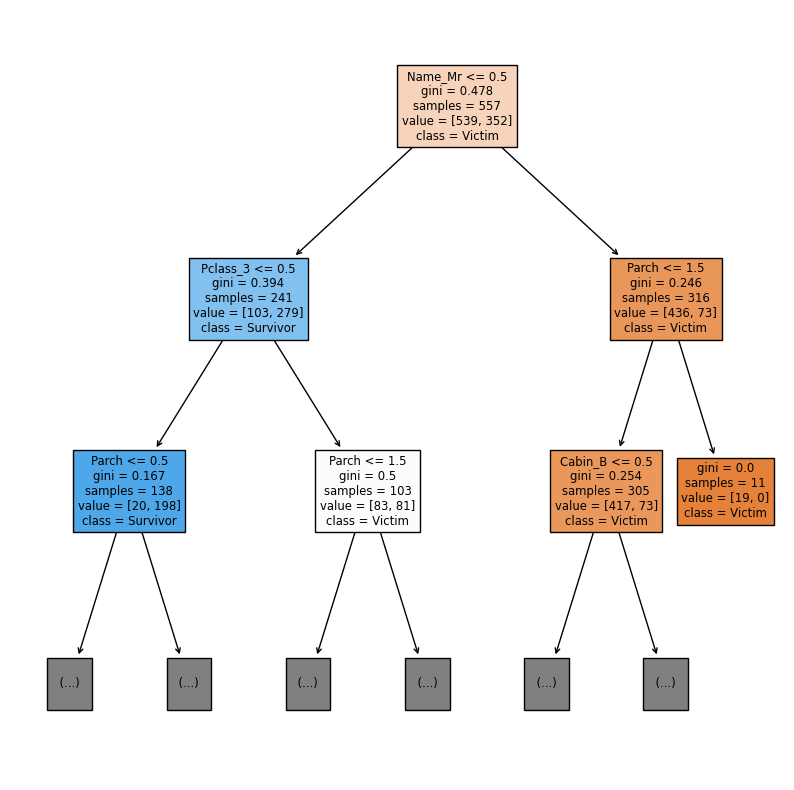

In [71]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
# 0~30
plot_tree(clf.estimators_[1],
     feature_names=x.columns,
     class_names=["Victim", "Survivor"],
     filled=True,
     max_depth=2)

In [72]:
imp = pd.Series(clf.feature_importances_, index=x.columns)
imp.sort_values(ascending=False)

Name_Mr        0.150459
Sex_female     0.126972
Fare           0.117264
Sex_male       0.096637
Age            0.094004
Pclass_3       0.059145
Ticket         0.056961
Family         0.046729
Name_Mrs       0.042413
Pclass_1       0.036414
Name_Miss      0.030834
SibSp          0.029936
Parch          0.020505
Pclass_2       0.016322
Name_Master    0.014403
Embarked_C     0.012384
Embarked_S     0.011140
Cabin_E        0.010278
Cabin_D        0.006931
Embarked_Q     0.006090
Cabin_C        0.005082
Cabin_B        0.004136
Cabin_A        0.002239
Cabin_G        0.001424
Cabin_F        0.001164
Cabin_T        0.000133
dtype: float64

<Axes: xlabel='Sex', ylabel='count'>

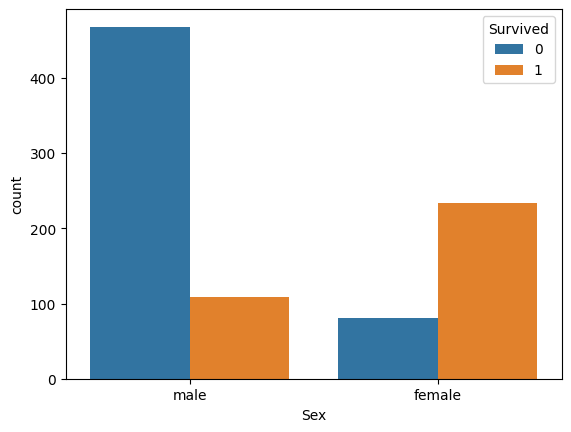

In [73]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=datas["Sex"],
       hue=datas["Survived"])

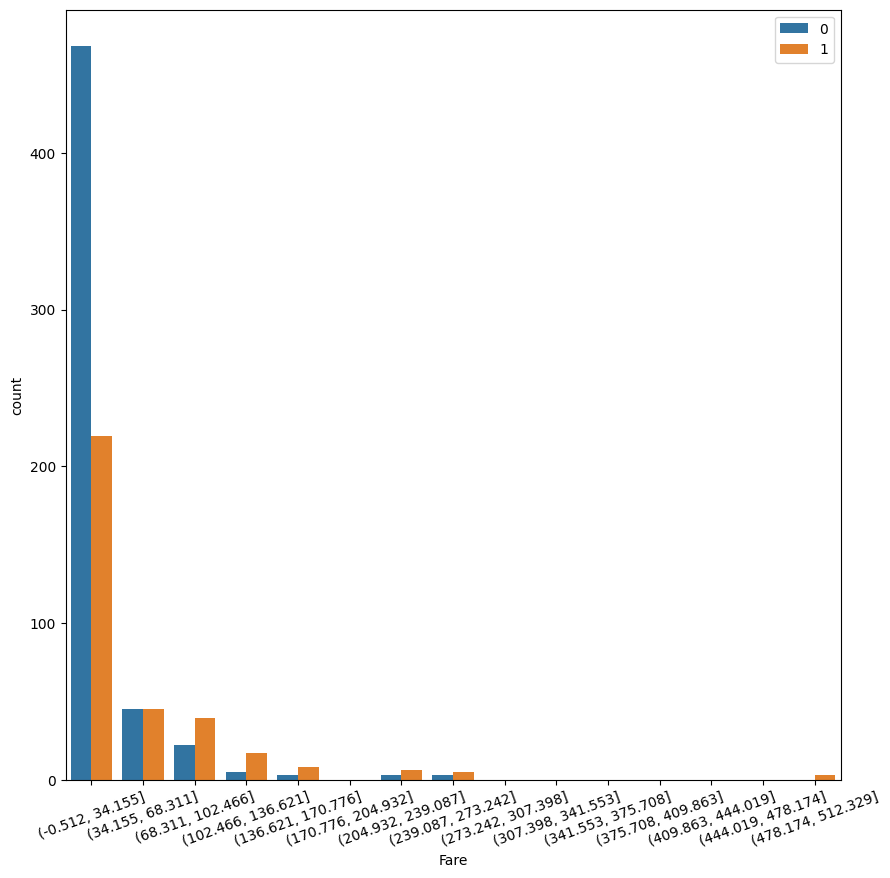

In [74]:
c = pd.cut(datas["Fare"], bins=15)
plt.figure(figsize=(10, 10))
sns.countplot(x=c, hue=datas["Survived"])
plt.xticks(rotation=20)
plt.legend(loc="upper right")

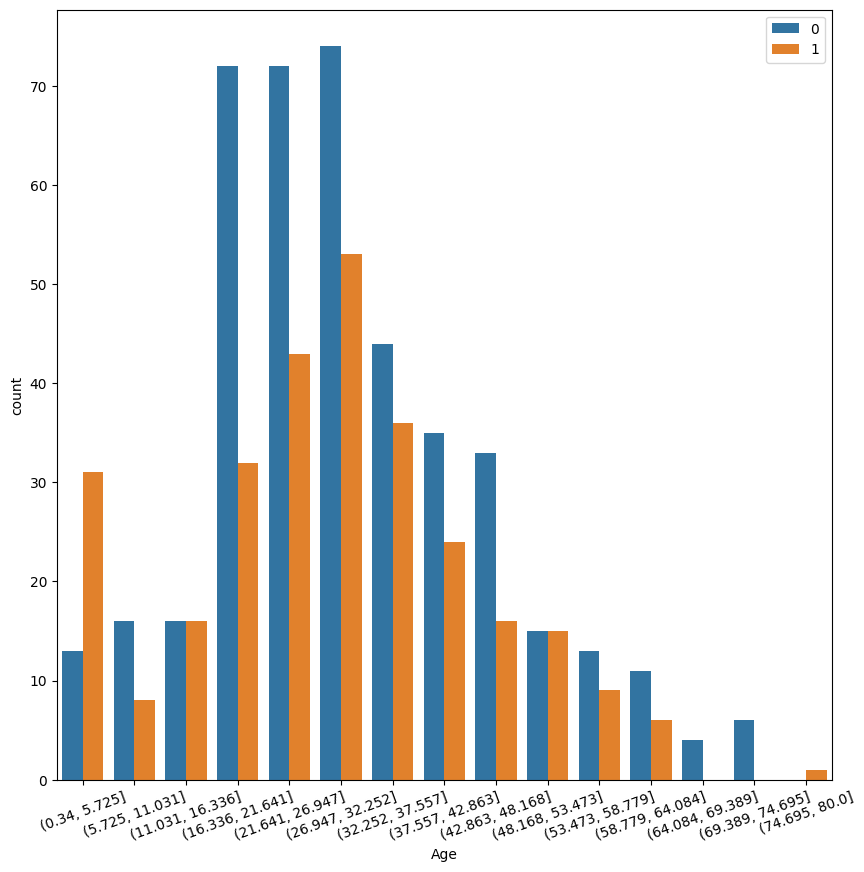

In [75]:
c = pd.cut(datas["Age"], bins=15)
plt.figure(figsize=(10, 10))
sns.countplot(x=c, hue=datas["Survived"])
plt.xticks(rotation=20)
plt.legend(loc="upper right")
